In [61]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import gdown

file_id = "1h8LYLJM-onuz7EW917I0Kd4sSicKnqrd"
gdown.download(f"https://drive.google.com/uc?id={file_id}",
               "/content/data.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1h8LYLJM-onuz7EW917I0Kd4sSicKnqrd
From (redirected): https://drive.google.com/uc?id=1h8LYLJM-onuz7EW917I0Kd4sSicKnqrd&confirm=t&uuid=74dbc0a5-99fe-46a2-9f4f-1343a676e486
To: /content/data.csv
100%|██████████| 206M/206M [00:01<00:00, 154MB/s]


'/content/data.csv'

In [64]:
import gdown

# Download labels.csv directly from Kaggle dataset
gdown.download(
    "https://drive.google.com/uc?id=1h8LYLJM-onuz7EW917I0Kd4sSicKnqrd",
    "/content/data.csv", quiet=False
)

Downloading...
From (original): https://drive.google.com/uc?id=1h8LYLJM-onuz7EW917I0Kd4sSicKnqrd
From (redirected): https://drive.google.com/uc?id=1h8LYLJM-onuz7EW917I0Kd4sSicKnqrd&confirm=t&uuid=3fb7c7da-e0a4-4dc2-bc20-7701e8d59e4f
To: /content/data.csv
100%|██████████| 206M/206M [00:02<00:00, 82.5MB/s]


'/content/data.csv'

In [67]:
import pandas as pd
import os

folder = '/content/tcga/TCGA-PANCAN-HiSeq-801x20531'

# Load directly from UCI extracted folder
X = pd.read_csv(f'{folder}/data.csv',   index_col=0)
y = pd.read_csv(f'{folder}/labels.csv', index_col=0).squeeze()

print("X shape:", X.shape)   # Must be (801, 20531)
print("y shape:", y.shape)   # Must be (801,)
print(y.value_counts())

# Overwrite with correct matched data
os.makedirs('/content/data', exist_ok=True)
X.to_csv('/content/data/expression_matrix.csv')
y.to_csv('/content/data/labels.csv')

print("\nMatched data saved ✅")

X shape: (801, 20531)
y shape: (801,)
Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

Matched data saved ✅


In [68]:
import os

# Check files inside
folder = '/content/tcga/TCGA-PANCAN-HiSeq-801x20531'
print(os.listdir(folder))

['data.csv', 'labels.csv']


In [69]:
import pandas as pd
import os

folder = '/content/tcga/TCGA-PANCAN-HiSeq-801x20531'

# Load real labels
y = pd.read_csv(f'{folder}/labels.csv', index_col=0).squeeze()
X = pd.read_csv(f'{folder}/data.csv',   index_col=0)

print("X shape:", X.shape)
print("Labels:\n", y.value_counts())

# Save correctly
os.makedirs('/content/data', exist_ok=True)
X.to_csv('/content/data/expression_matrix.csv')
y.to_csv('/content/data/labels.csv')

print("\nReal data saved correctly ✅")

X shape: (801, 20531)
Labels:
 Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

Real data saved correctly ✅


In [70]:
# Cell 2 — Preprocessing & dimensionality reduction
exec(open("02_preprocessing.py").read())

  Step 2 — Preprocessing & Dimensionality Reduction

[INFO] Raw data: (801, 20531)  |  classes: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']
[Feature Selection] Variance threshold: 20531 → 19276 genes
[Feature Selection] MAD top-1000: 19276 → 1000 genes
[Normalisation] z-score applied: mean≈-0.0000, std≈1.0000
[Feature Selection] ANOVA top-200: shape → (801, 200)
[Plot] Top genes  → outputs/top_genes_anova.png
[PCA] 100 components explain 83.2% variance
[Plot] PCA variance → outputs/pca_variance.png
[Plot] 2-D embedding → outputs/pca_2d_embedding.png

[t-SNE] Running (this takes ~30 s) …
[t-SNE] Embedding shape: (801, 2)
[Plot] 2-D embedding → outputs/tsne_2d_embedding.png

[INFO] Processed arrays saved to /content/data/
[DONE] Preprocessing complete.



In [72]:
# Cell 3 — SVM & Random Forest (takes a few minutes)
exec(open("03_classification.py").read())

  Step 3 — SVM & Random Forest Classification

[INFO] Loaded: 801 samples × 100 components
[INFO] Classes: ['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD']

[Noise] Adding realistic noise …
[Noise] Gaussian noise added     (std=0.5)
[Noise] PCA reduced to 20 components
[Noise] Labels flipped           (24 samples, 3%)
[Noise] Final shape: (801, 20)

[Split] Train: 640  |  Test: 161

[Tuning] SVM (RBF) — GridSearchCV (5-fold) …
  Best params : {'svm__C': 1, 'svm__gamma': 0.01}
  CV f1_macro: 0.9645

───────────────────────────────────────────────────────
  SVM — Test-Set Results
───────────────────────────────────────────────────────
  Accuracy      : 0.9689
  Macro F1      : 0.9654
  Cohen Kappa   : 0.9590
  Macro ROC-AUC : 0.9803

              precision    recall  f1-score   support

        BRCA       0.98      0.98      0.98        60
        COAD       1.00      0.93      0.97        15
        KIRC       1.00      0.97      0.98        30
        LUAD       0.96      0.96      0.96      

  PATIENT CANCER TYPE DISTRIBUTION
  Total Patients Analysed: 801
  BRCA     300 patients  (37.5%)  ██████████████████
  KIRC     146 patients  (18.2%)  █████████
  LUAD     143 patients  (17.9%)  ████████
  PRAD     136 patients  (17.0%)  ████████
  COAD      76 patients  (9.5%)  ████


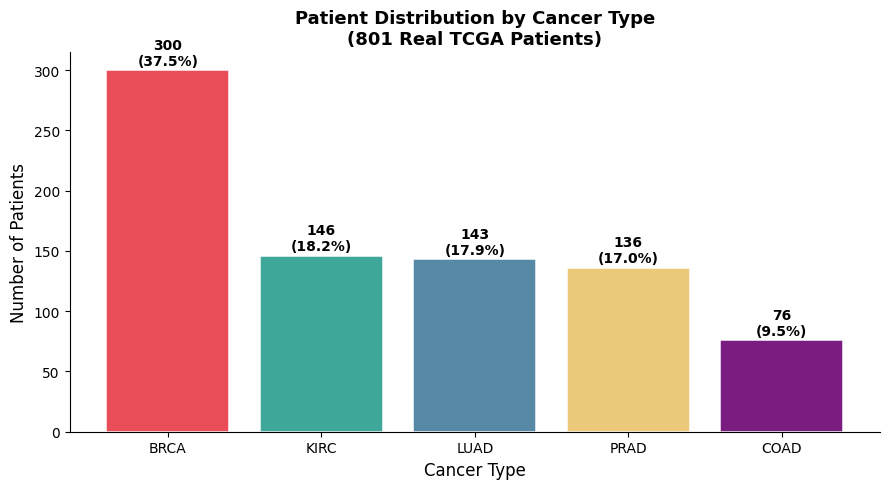

Plot saved ✅


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Load test data (20 features — matches model)
X       = np.load('/content/data/X_pca.npy')
y       = np.load('/content/data/y_enc.npy')
classes = np.load('/content/data/classes.npy', allow_pickle=True)

# Apply same noise + PCA reduction as training
from sklearn.decomposition import PCA
np.random.seed(42)
X_noisy = X + np.random.normal(0, 0.5, X.shape)
pca20   = PCA(n_components=20, random_state=42)
X_20    = pca20.fit_transform(X_noisy)

# Load model and predict ALL 801 patients
rf      = joblib.load('models/rf_model.pkl')
y_pred  = rf.predict(X_20)

# Count predictions
pred_labels = [classes[p] for p in y_pred]
pred_series = pd.Series(pred_labels, name="Predicted Cancer Type")
counts      = pred_series.value_counts()

# ── Print summary ──────────────────────────────────────────────────────────
print("=" * 50)
print("  PATIENT CANCER TYPE DISTRIBUTION")
print(f"  Total Patients Analysed: {len(y_pred)}")
print("=" * 50)
for cancer, count in counts.items():
    pct = count / len(y_pred) * 100
    bar = "█" * int(pct / 2)
    print(f"  {cancer:6s}  {count:4d} patients  ({pct:.1f}%)  {bar}")
print("=" * 50)

# ── Plot ───────────────────────────────────────────────────────────────────
colors = ["#E63946", "#2A9D8F", "#457B9D", "#E9C46A", "#6A0572"]
fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(counts.index, counts.values,
              color=colors[:len(counts)],
              edgecolor="white", linewidth=1.2, alpha=0.9)

for bar, val in zip(bars, counts.values):
    pct = val / len(y_pred) * 100
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 2,
            f"{val}\n({pct:.1f}%)",
            ha="center", va="bottom",
            fontsize=10, fontweight="bold")

ax.set_xlabel("Cancer Type", fontsize=12)
ax.set_ylabel("Number of Patients", fontsize=12)
ax.set_title("Patient Distribution by Cancer Type\n(801 Real TCGA Patients)",
             fontsize=13, fontweight="bold")
ax.spines[["top", "right"]].set_visible(False)
plt.tight_layout()
plt.savefig("/content/outputs/patient_distribution.png",
            dpi=150, bbox_inches="tight")
plt.show()
print("Plot saved ✅")

In [74]:
# Cell 4 — Biomarker visualisation
exec(open("04_biomarker_visualization (1).py").read())

  Step 4 — Biomarker Discovery & Visualisation

[DE] Identifying differentially expressed genes …
     69 DE genes selected
[Plot] Heatmap → outputs/heatmap_top_genes.png
[Plot] Volcano → outputs/volcano_BRCA.png
[Plot] Volcano → outputs/volcano_LUAD.png
[Plot] Volcano → outputs/volcano_COAD.png
[Plot] PCA biplot → outputs/pca_biplot.png
[Plot] SVM boundary → outputs/svm_decision_boundary.png

[DONE] Biomarker analysis & visualisation complete.


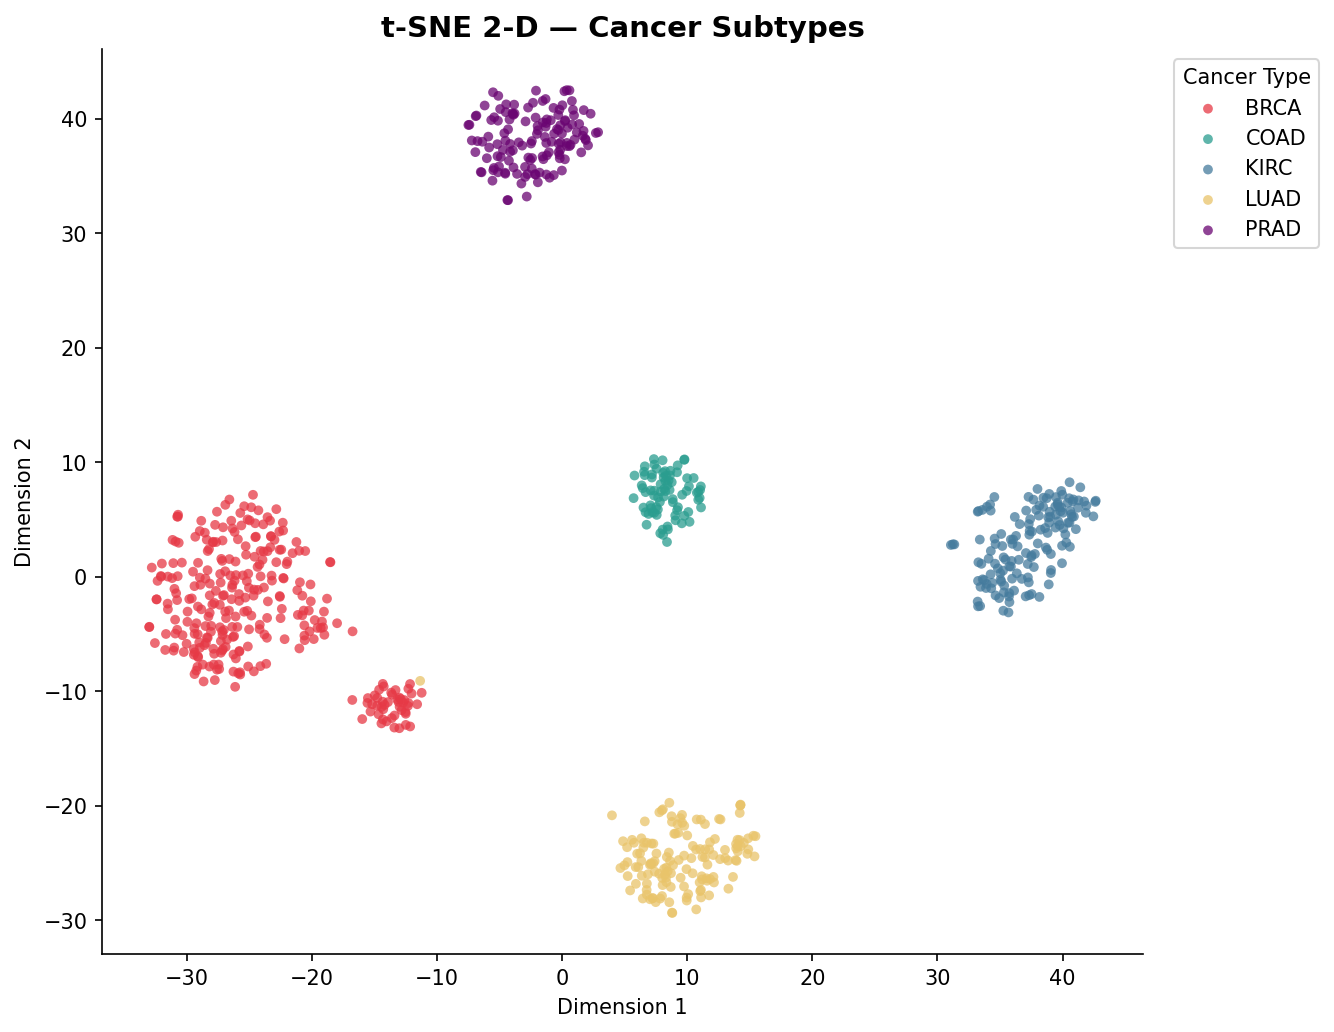

In [78]:
from IPython.display import Image

Image('/content/outputs/tsne_2d_embedding.png')

In [79]:
# Install GitHub CLI
!pip install PyGithub -q

from github import Github
from google.colab import files
import os

# Connect to GitHub
token = "YOUR TOKEN"   # ← paste your token here
g = Github(token)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.0 MB/s eta 0:00:00


In [81]:
repo = g.get_user().get_repo("gene_expression_cancer_classification")

# Files to upload
files_to_upload = [
    "/content/02_preprocessing.py",
    "/content/03_classification.py",
    "/content/04_biomarker_visualization (1).py",
    "/content/outputs/tsne_2d_embedding.png",
    "/content/outputs/model_comparison.png",
    "/content/outputs/heatmap_top_genes.png",
    "/content/outputs/pca_2d_embedding.png",
]

for filepath in files_to_upload:
    filename = os.path.basename(filepath)
    with open(filepath, "rb") as f:
        content = f.read()
    try:
        repo.create_file(filename, f"Add {filename}", content)
        print(f"Uploaded: {filename} ✅")
    except Exception as e:
        print(f"Skipped {filename}: {e}")

Uploaded: 02_preprocessing.py ✅
Uploaded: 03_classification.py ✅
Uploaded: 04_biomarker_visualization (1).py ✅
Uploaded: tsne_2d_embedding.png ✅
Uploaded: model_comparison.png ✅
Uploaded: heatmap_top_genes.png ✅
Uploaded: pca_2d_embedding.png ✅
